In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('C:/Users/Admin/Desktop/Titanic Task/train.csv')
test_df = pd.read_csv('C:/Users/Admin/Desktop/Titanic Task/test.csv')

In [5]:
combine = [train_df,test_df]

In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pernot, Mr. Rene",male,1601,G6,S
freq,1,577,7,4,644


In [17]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


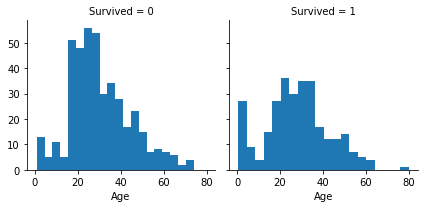

In [23]:
g = sns.FacetGrid(train_df,col = 'Survived')
g.map(plt.hist,'Age',bins = 20)

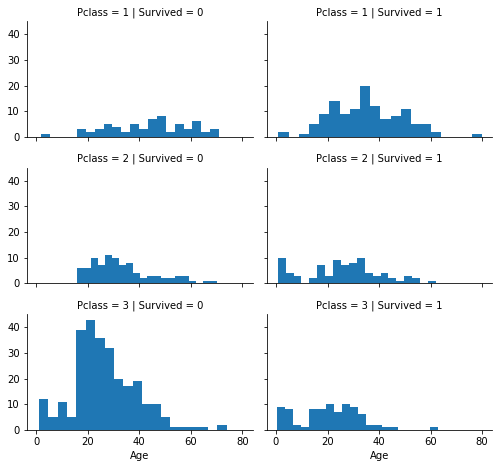

In [25]:
grid = sns.FacetGrid(train_df,col = 'Survived',row = 'D',size = 2.2,aspect = 1.6)
grid.map(plt.hist,'Age',bins = 20)

In [26]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


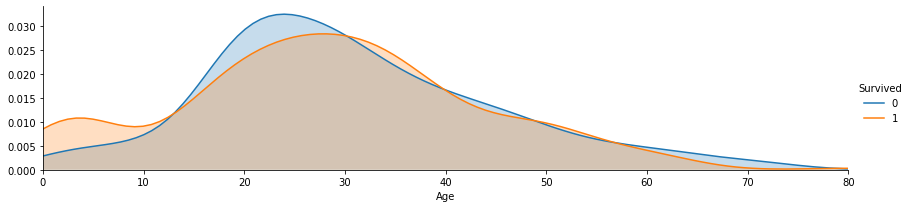

In [32]:
a = sns.FacetGrid( train_df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_df['Age'].max()))
a.add_legend()

In [35]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
    #complete embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
train_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

In [36]:
train_df['FamilySize'] = train_df ['SibSp'] + train_df['Parch'] + 1

train_df['IsAlone'] = 1 
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0 

train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)

train_df['AgeBin'] = pd.cut(train_df['Age'].astype(int), 5)

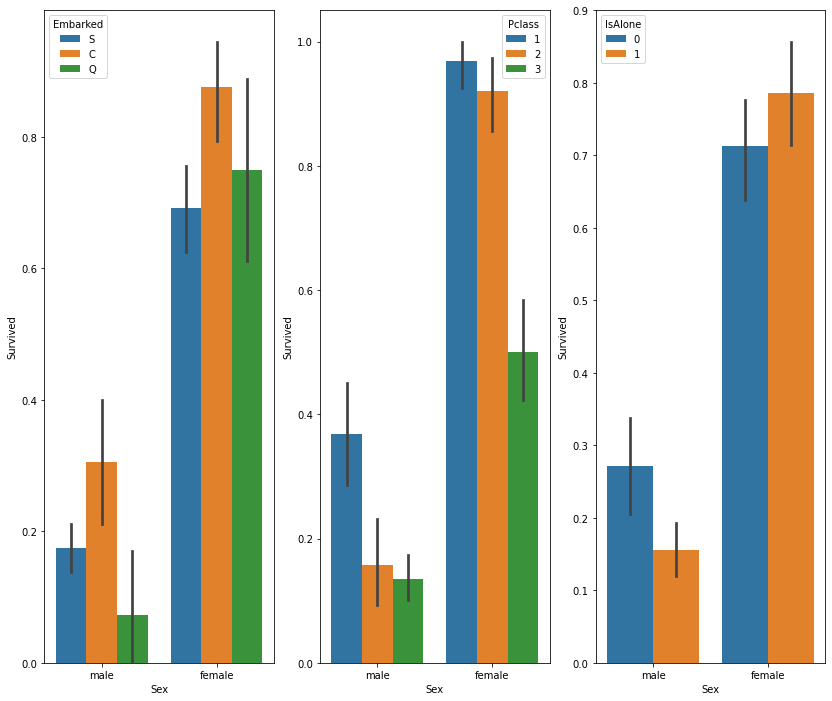

In [38]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train_df, ax = qaxis[0])
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train_df, ax  = qaxis[1])
sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=train_df, ax  = qaxis[2])

In [50]:
train_df.shape, test_df.shape

((891, 15), (418, 10))

In [51]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)

In [54]:
train_df =  train_df.drop(['Ticket'],axis = 1)

In [56]:
train_df =  train_df.drop(['Cabin'],axis = 1)

In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,male,22.0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,female,38.0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,female,26.0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,female,35.0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,male,35.0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


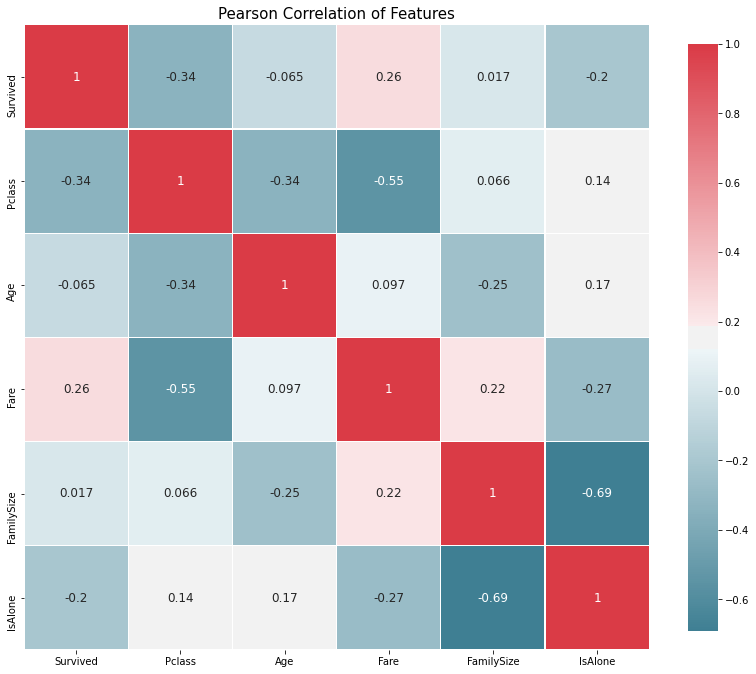

In [58]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_df)

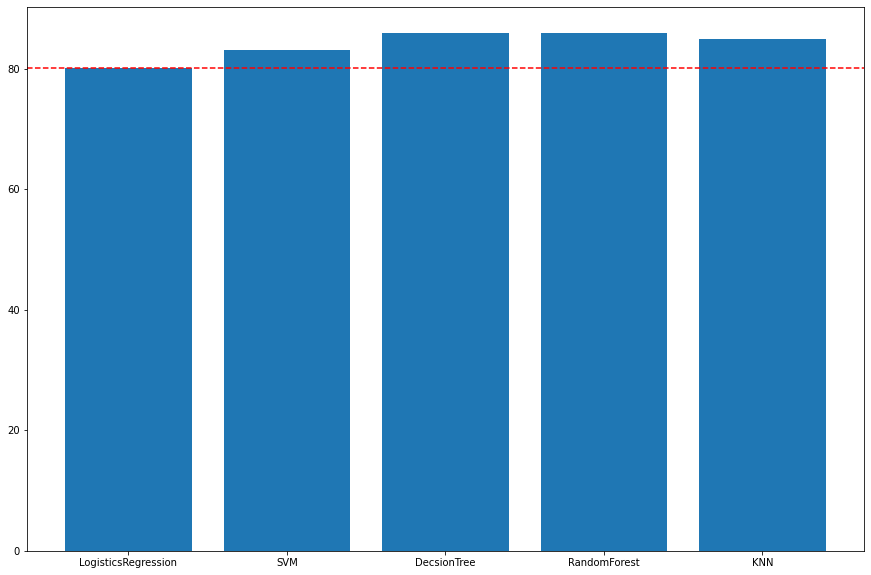

In [69]:
accuracy = [80.13, 83.16, 85.97, 85.97, 85.07]
Y = ['LogisticsRegression','SVM','DecsionTree','RandomForest','KNN']
plt.figure(figsize=(15,10))
plt.bar(Y,X)
plt.axhline(y=80.13, label="average frequency",linestyle='dashed',   color='r')
plt.show()